# 情報システム工学演習I

## 例題 ex01
- 例題1. データの可視化と分析
- 例題2. 時系列データ予測



### 例題1.  データの可視化と分析

#### (1-1) データのインポート

- AirPassengers (飛行機乗客数）を使用。
- data_AirPassengers.csvをアップロードしてから以下を実行。

In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
import pandas as pd # pandas のimport
fn='./google_trends_pants.csv' # ファイル名を指定
# fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_AirPassengers.csv' # URLから直接ダウンロードする場合
index_col = 'Week' # インデックスを指定
df = pd.read_csv(fn, index_col=index_col, parse_dates=True)
df.head() # 可視化 (table)


,pants
Week,
2020-04-19,53
2020-04-26,60
2020-05-03,61
2020-05-10,70
2020-05-17,74


#### (1-2) データの可視化

<Axes: xlabel='Week'>

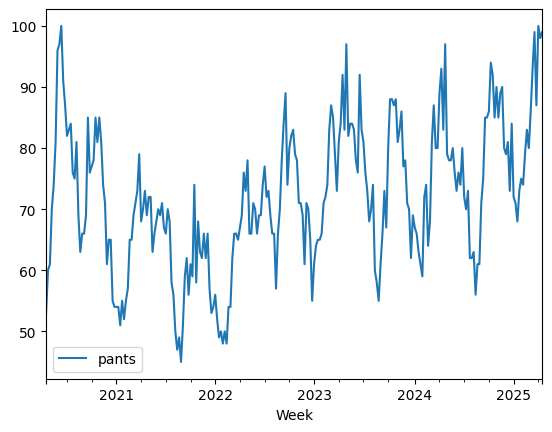

In [35]:
df.plot() #可視化 (figure)

#### (1-3) データの分析

データについて分析してみる
- 右肩上がりの傾向 (long-term growing trend)
- 周期性あり（yearly periodicity)


### 例題2. 時系列モデルを使った将来予測

#### (2-1) 時系列モデル (AutoRegressive model) を用いた将来予測

- 時系列解析ツールのインポート（色々なツールが存在します。例えば、以下のものを使ってみます。）
- 学習データ、予測データの作成



In [36]:
# https://www.statsmodels.org/stable/tsa.html
!pip install statsmodels


In [37]:
# 準備：各種インポート
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg



各AR次数での予測精度比較:

AR(12)の予測誤差:
{'RMSE': 13.11427997381247, 'MAE': 9.696023347910565}

AR(24)の予測誤差:
{'RMSE': 11.684042902379941, 'MAE': 9.601105083571943}

AR(36)の予測誤差:
{'RMSE': 10.808174251507522, 'MAE': 8.846821307430965}

AR(54)の予測誤差:
{'RMSE': 10.146274209025378, 'MAE': 8.808917366793967}


Text(0.5, 1.0, 'Comparison of Predictions with Different AR Orders')

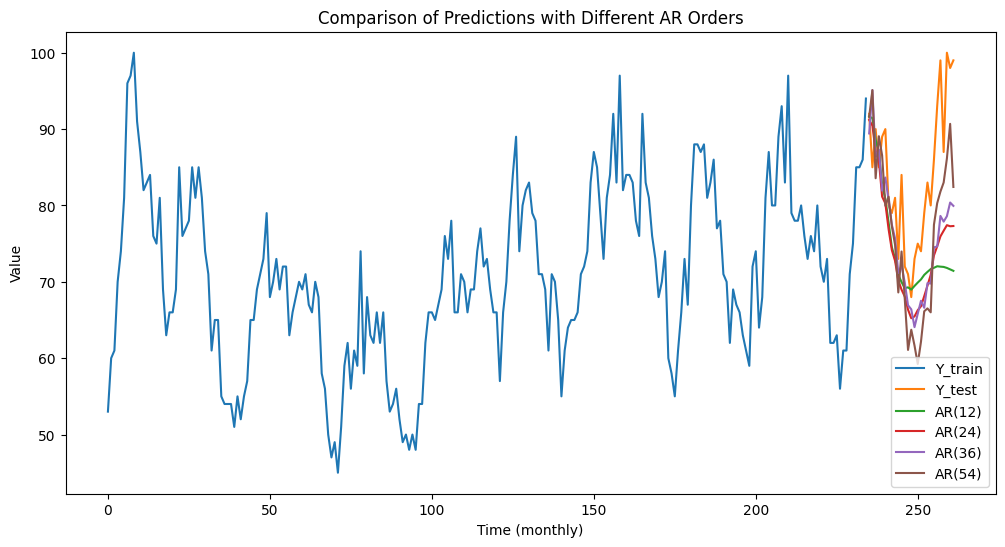

In [41]:
# AutoRegressive model を用いた時系列モデル学習と将来予測（複数のAR次数で比較）
lag_ar_list = [12, 24, 36, 54]  # 比較するARのパラメータ数のリスト
plt.figure(figsize=(12, 6))
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test')

print("各AR次数での予測精度比較:")
rmse_list = []
mae_list = []
for lag_ar in lag_ar_list:
    ar = AutoReg(Y_train, lags=lag_ar)
    res = ar.fit()
    Y_pred = ar.predict(res.params, start=n_b, end=n_c-1)
    plt.plot(np.arange(n_b,n_c), Y_pred, label=f'AR({lag_ar})')
    accuracy = my_accuracy(Y_test, Y_pred)
    print(f'\nAR({lag_ar})の予測誤差:')
    print(accuracy)
    rmse_list.append(accuracy['RMSE'])
    mae_list.append(accuracy['MAE'])

plt.xlabel('Time (monthly)')
plt.ylabel('Value')
plt.legend()
plt.title('Comparison of Predictions with Different AR Orders')


予測精度の比較表:
  AR次数      RMSE      MAE
AR(12) 13.114280 9.696023
AR(24) 11.684043 9.601105
AR(36) 10.808174 8.846821
AR(54) 10.146274 8.808917


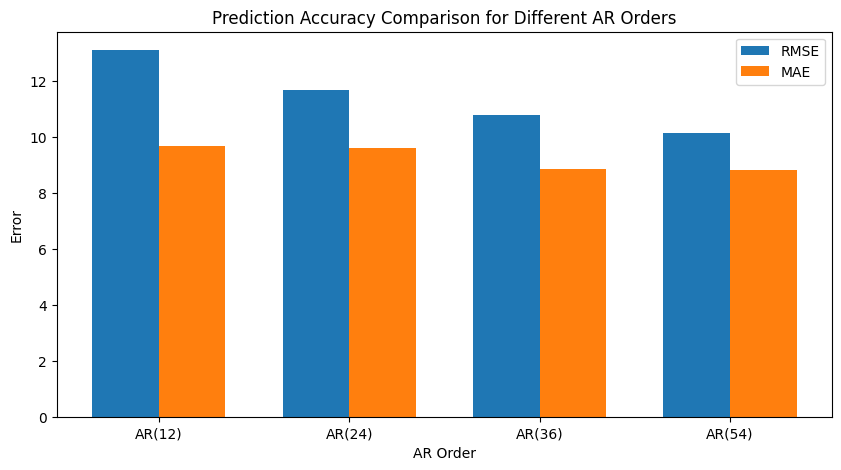

In [42]:
# 予測精度の比較グラフ
plt.figure(figsize=(10, 5))
x = np.arange(len(lag_ar_list))
width = 0.35

plt.bar(x - width/2, rmse_list, width, label='RMSE')
plt.bar(x + width/2, mae_list, width, label='MAE')

plt.xlabel('AR Order')
plt.ylabel('Error')
plt.title('Prediction Accuracy Comparison for Different AR Orders')
plt.xticks(x, [f'AR({lag})' for lag in lag_ar_list])
plt.legend()

# 予測精度の比較表
comparison_df = pd.DataFrame({
    'AR次数': [f'AR({lag})' for lag in lag_ar_list],
    'RMSE': rmse_list,
    'MAE': mae_list
})
print("\n予測精度の比較表:")
print(comparison_df.to_string(index=False))

#### (2-2) 予測精度の計算 (RMSE, MAE)

In [43]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
# 予測誤差を計算する関数
def my_accuracy(y_true, y_pred):
  accuracy = {
            "RMSE":   root_mean_squared_error(y_true,  y_pred),
            "MAE":    mean_absolute_error(y_true, y_pred)
            }
  return accuracy
# 予測誤差を表示
print(f'Forecasting error: {my_accuracy(Y_test, Y_pred)}')

Forecasting error: {'RMSE': 10.146274209025378, 'MAE': 8.808917366793967}
